In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import random
import sklearn.metrics

Reference: https://github.com/alchemistry/alchemical-best-practices/blob/master/paper/figures/fig13_analysis_practices/gen_plots.py

In [13]:
ddg_data = pd.read_csv("../outputs/free_energy/ddg_data.csv")
ddg_exp = ddg_data["ddg_exp"].to_numpy()
ddg_afe = ddg_data["ddg_afe"].to_numpy()
exp_err = ddg_data["ddg_exp_err"].to_numpy()
afe_err = ddg_data["ddg_afe_err"].to_numpy()


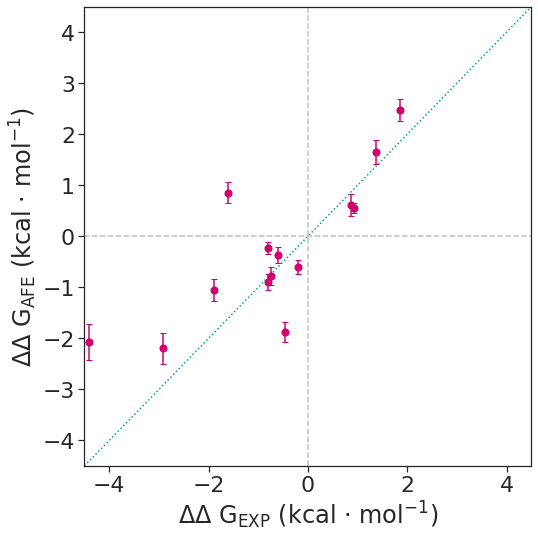

In [14]:
plt.figure(figsize=(8, 8))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plt.scatter(ddg_exp, ddg_afe, s=50, color="#D0006F")
plt.scatter(3, 2.5, s=0)

(_, caps, _) = plt.errorbar(ddg_exp,
                           ddg_afe,
                           color="#D0006F",
                           yerr=afe_err,
                           capsize=3,
                           linestyle="",
                           zorder=-1)

plt.plot([-4.5, 4.5], [-4.5, 4.5], color="#0099AB", linestyle=":", zorder=-1)
plt.vlines(0, -4.5, 4.5, color = "silver", linestyle="--", zorder=-1)
plt.hlines(0, -4.5, 4.5, color = "silver", linestyle="--", zorder=-1)

plt.xlabel(r"$\Delta\Delta$ G$_{\mathrm{EXP}}$ (kcal $\cdot$ mol$^{-1}$)")
plt.ylabel(r"$\Delta\Delta$ G$_{\mathrm{AFE}}$ (kcal $\cdot$ mol$^{-1}$)")
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.tight_layout()
plt.savefig("../../plots/free_energy/correlation_tr.pdf", transparent=True)



In [6]:
pearson_r = scipy.stats.pearsonr(ddg_exp, ddg_afe)
pearson_r

(0.7921104347381558, 0.0007323742818836341)

# Bootstrap data to get bounds on correlation

Reference: https://github.com/alchemistry/alchemical-best-practices/blob/master/paper/figures/fig13_analysis_practices/gen_plots.py

In [9]:
def bootstrap(experimental: np.array, calculated: np.array, n_samples = 10000, alpha_level = 0.05):
    """
    bootstrap pearson's r 
    """
    n_data_samples = len(experimental)
    statistics_dict = {"r": [],
                       "mue": []}

    for i in range(n_samples):
        if i==0:
            experimental_samples = experimental
            calculated_samples = calculated
        else:
            bootstrap_sample = np.random.choice(range(n_data_samples), size = n_samples)
            experimental_samples = [experimental[i] for i in bootstrap_sample]
            calculated_samples = [calculated[i] for i in bootstrap_sample]
        pearson, p_value = scipy.stats.pearsonr(experimental_samples, calculated_samples)
        mue = sklearn.metrics.mean_absolute_error(experimental_samples, calculated_samples)
        statistics_dict["r"].append(pearson)
        statistics_dict["mue"].append(mue)
    
    results = {"r": {},
               "mue": {}}
    lower_fraction = alpha_level/2.0
    upper_fraction = 1 - lower_fraction
    for statistic in statistics_dict.keys():
        results[statistic]["real"] = statistics_dict[statistic][0]
        statistics_dict[statistic] = sorted(statistics_dict[statistic])
        results[statistic]["mean"] = np.mean(statistics_dict[statistic])
        results[statistic]["lower"] = statistics_dict[statistic][int(n_samples * lower_fraction)]
        results[statistic]["upper"] = statistics_dict[statistic][int(n_samples * upper_fraction)]
    return results

In [10]:
bootstrapped_results = bootstrap(ddg_exp, ddg_afe)


In [11]:
bootstrapped_results

{'r': {'real': 0.7921104347381558,
  'mean': 0.7921642083371022,
  'lower': 0.7845325776568677,
  'upper': 0.7995427969816393},
 'mue': {'real': 0.7602741823475577,
  'mean': 0.7602340661895505,
  'lower': 0.7457858335618487,
  'upper': 0.7751573235079341}}